This code is used to create additional figures. Not all of the code may be used or be relevant and requires packages not required of other tutorials (but are included in the .yml file).

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from gstatsMCMC import Topography
from gstatsMCMC import MCMC
import gstatsim as gs
from sklearn.preprocessing import QuantileTransformer
import skgstat as skg
import tqdm as tqdm
import scipy.ndimage
import matplotlib.patches as patches
import geopandas as gpd

In [47]:
df = pd.read_csv('ScottDataGriddedFinal.csv')

In [48]:
x_uniq = np.unique(df.x)
y_uniq = np.unique(df.y)

xmin = np.min(x_uniq)
xmax = np.max(x_uniq)
ymin = np.min(y_uniq)
ymax = np.max(y_uniq)

cols = len(x_uniq)
rows = len(y_uniq)

resolution = 500

xx, yy = np.meshgrid(x_uniq, y_uniq)

In [49]:
dhdt = df['dhdt'].values.reshape(xx.shape)
smb = df['smb'].values.reshape(xx.shape)
velx = df['velx'].values.reshape(xx.shape)
vely = df['vely'].values.reshape(xx.shape)
bedmap_mask = df['bedmap_mask'].values.reshape(xx.shape)
bedmachine_thickness = df['bedmachine_thickness'].values.reshape(xx.shape)
bedmap_surf = df['bedmap_surf'].values.reshape(xx.shape)
highvel_mask = df['highvel_mask'].values.reshape(xx.shape)
bedmachine_bed = df['bedmap_surf'].values.reshape(xx.shape) - bedmachine_thickness
bedmachine_source = df['bedmachine_source'].values.reshape(xx.shape)
bedmap_bed = df['bedmap_bed'].values.reshape(xx.shape)

In [50]:
beds0 = np.loadtxt('SmallScaleBed0txt.txt')

(-255500.0, -139000.0, -480500.0, -250500.0)

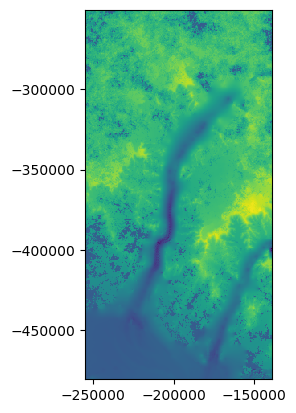

In [51]:
plt.pcolormesh(xx,yy, beds0 , vmax = 4000 , vmin = -3000)
plt.axis('scaled')

In [52]:
# = [(x1, y1), {x2, y2)]
line = [(-220000, -350000), (-180000, -350000)]

In [10]:
# Convert the line to pixel/index coordinates
x_world, y_world = np.array(list(zip(*line)))
col = beds0.shape[1] * (x_world - xx.min()) / xx.ptp()
row = beds0.shape[0] * (y_world - yy.min()) / yy.ptp()

colbedmachine = bedmachine_bed.shape[1] * (x_world - xx.min()) / xx.ptp()
rowbedmachine = bedmachine_bed.shape[0] * (y_world - yy.min()) / yy.ptp()

In [11]:
# Interpolate the line at "num" points...
num = 1000
row1, col1 = [np.linspace(item[0], item[1], num) for item in [row, col]]

rowbedmachine1, colbedmachine1 = [np.linspace(item[0], item[1], num) for item in [rowbedmachine, colbedmachine]]

In [12]:
zi = scipy.ndimage.map_coordinates(beds0, np.vstack((row1, col1)))

yi = scipy.ndimage.map_coordinates(bedmachine_bed, np.vstack((rowbedmachine1, colbedmachine1)))

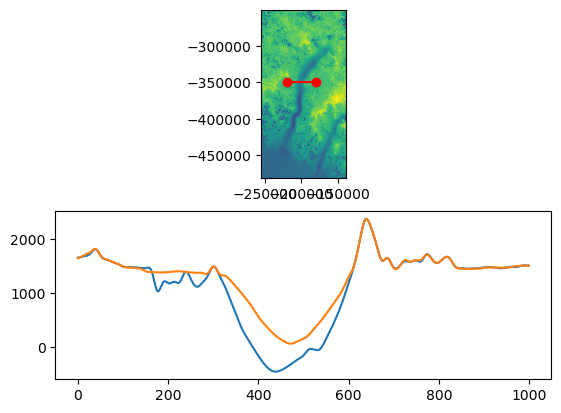

In [13]:
fig, axes = plt.subplots(nrows=2)
axes[0].pcolormesh(xx, yy, beds0)
axes[0].plot(x_world, y_world, 'ro-')
axes[0].axis('image')

axes[1].plot(zi)
axes[1].plot(yi)

plt.show()

In [14]:
SSC0 = np.loadtxt('SmallScaleBed0txt.txt')
SSC1 = np.loadtxt('SmallScaleBed1txt.txt')
SSC2 = np.loadtxt('SmallScaleBed2txt.txt')
SSC3 = np.loadtxt('SmallScaleBed3txt.txt')
SSC4 = np.loadtxt('SmallScaleBed4txt.txt')
SSC5 = np.loadtxt('SmallScaleBed5txt.txt')

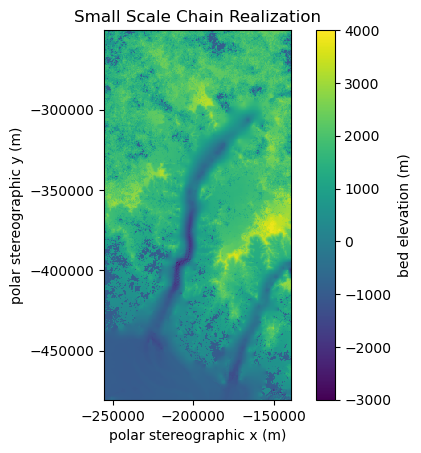

In [32]:
plt.pcolormesh(xx,yy, SSC0, vmax = 4000 , vmin = -3000)
plt.axis('scaled')
plt.xlabel('polar stereographic x (m)')
plt.ylabel('polar stereographic y (m)')
plt.title('Small Scale Chain Realization')

plt.colorbar(label = 'bed elevation (m)')

plt.savefig('SSCrealization0')

In [34]:
radar_data = np.loadtxt('RadarDatatxt.txt')

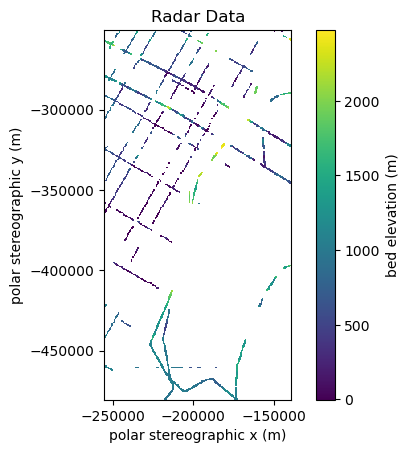

In [36]:
plt.pcolormesh(xx,yy, radar_data)
plt.axis('scaled')
plt.xlabel('polar stereographic x (m)')
plt.ylabel('polar stereographic y (m)')
plt.title('Radar Data')

plt.colorbar(label = 'bed elevation (m)')
plt.savefig('RadarDataVisualized')

In [61]:
xmin2, xmax2 = -255250/1000, -138750/1000
ymin2, ymax2 = -480250/1000, -250250/1000

xmin_ant = -3333250
xmax_ant = 3333250
ymin_ant = -3333250
ymax_ant = 3333250

In [62]:
# Grounding Line Code (Niya wrote this)
gl = gpd.read_file('moa2014_grounding_line_v01.shp')
glx,gly = gl.geometry[0].exterior.xy
glau = gl.geometry.clip_by_rect(xmin_ant, ymin_ant, xmax_ant, ymax_ant)
glaux,glauy = glau[0].exterior.xy

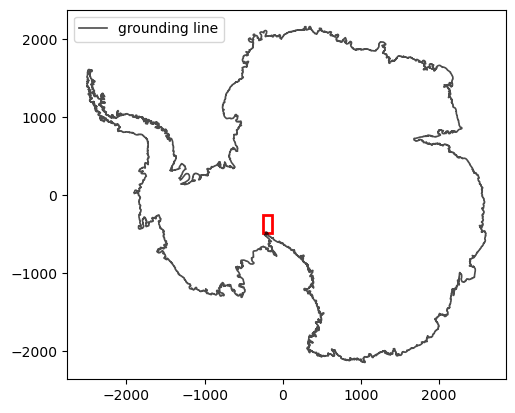

In [63]:
plt.plot(np.array(glaux[4:-4])/1000,np.array(glauy[4:-4])/1000,color='black',alpha=0.7,linestyle='-',linewidth=1.2,label='grounding line')

rect = patches.Rectangle((xmin2,ymin2), xmax2-xmin2 , ymax2 - ymin2, linewidth = 2, edgecolor = 'red', facecolor = 'none')
plt.gca().add_patch(rect)
plt.axis('scaled')
plt.legend()
plt.show()